In [1]:
import numpy as np
import nibabel as nb
import pandas as pd
import scipy.io
from scipy import stats
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
scipy.io.loadmat('E:/FPP_files_and_codes/FPP_codebase/Figure5_analysis/result.mat')['activity_sub_patch_run'][0]

array([-0.15702436,  0.1546769 ,  0.22006072,  0.33388004,  0.29814622,
        0.24178316,  0.06521909,  0.21375845,  0.18768041, -0.09578602,
       -0.06748204,  0.07055642,  0.22025852,  0.25864978,  0.36764454,
        0.10469574,  0.08651896,  0.45023763,  0.36502667,  0.67337499])

In [3]:
scipy.io.loadmat('E:/FPP_files_and_codes/FPP_codebase/Figure5_analysis/result.mat')['activity_sub_patch_run'].shape

(176, 20)

In [4]:
activity_FPP_each_subject = np.zeros((5, 176, 4))
for i in range(5):
    a = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_codebase/Figure5_analysis/result.mat')['activity_sub_patch_run']
    col_mask = np.arange(a.shape[1]) % 5 == i
    activity_FPP_each_subject[i] = a[:, col_mask]

In [5]:
col_mask

array([False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True])

In [6]:
activity_FPP_each_subject.shape

(5, 176, 4)

In [7]:
Mean_activity_each_FPP_in_each_run = np.zeros((5,4))
SEM_each_FPP_in_each_run = np.zeros((5,4))

for i in range(5):
    Mean_activity_each_FPP_in_each_run[i] = np.mean(activity_FPP_each_subject[i], axis=0)
    SEM_each_FPP_in_each_run[i] = stats.sem(activity_FPP_each_subject[i], axis=0)

In [8]:
np.mean(activity_FPP_each_subject[0], axis=0)

array([0.06903575, 0.07114638, 0.01832416, 0.05866111])

In [9]:
Mean_activity_each_FPP_in_each_run

array([[0.06903575, 0.07114638, 0.01832416, 0.05866111],
       [0.10691892, 0.18396991, 0.12314771, 0.14454936],
       [0.10795942, 0.26737733, 0.21559419, 0.26795442],
       [0.0846508 , 0.28059285, 0.24270353, 0.3125884 ],
       [0.13732901, 0.31127082, 0.24218544, 0.27772421]])

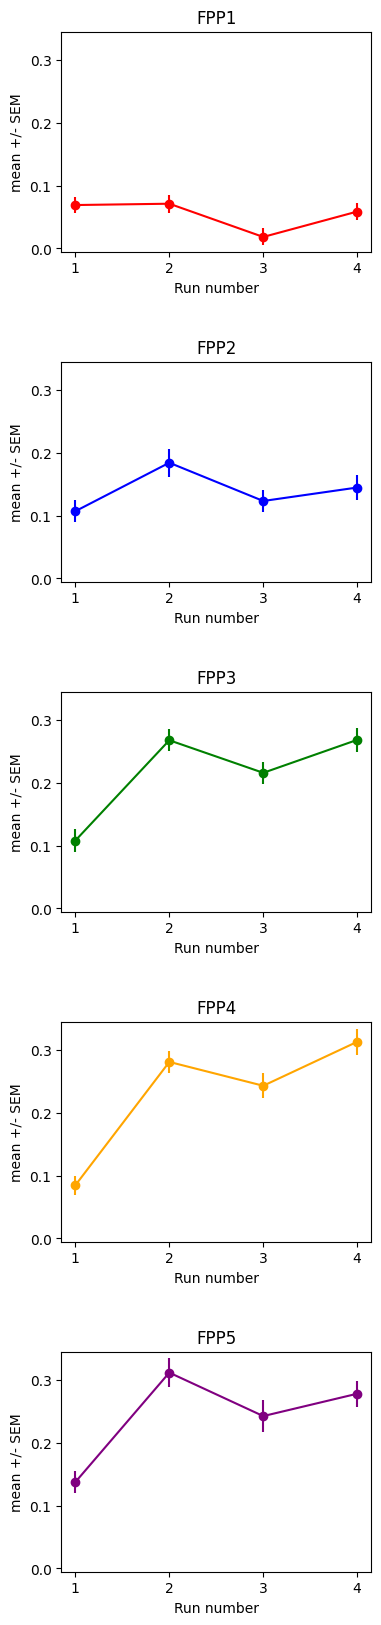

In [9]:
x = [1, 2, 3, 4]

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, axs = plt.subplots(5, 1, figsize=(4, 20))
max_vals = []
min_vals = []
for i in range(5):
    max_vals.append(max(Mean_activity_each_FPP_in_each_run[i] + SEM_each_FPP_in_each_run[i]))
    min_vals.append(min(Mean_activity_each_FPP_in_each_run[i] - SEM_each_FPP_in_each_run[i]))

y_min = min(min_vals)-0.01
y_max = max(max_vals)+0.01
for i in range(5):
    axs[i].set_ylim(y_min, y_max)

# for i in range(5):
#     axs[i].set_yticks(np.arange(y_min, y_max+0.1,0.1))
    
for i in range(5):
    axs[i].errorbar(x, Mean_activity_each_FPP_in_each_run[i], yerr=SEM_each_FPP_in_each_run[i], fmt='-o', color=colors[i])
    axs[i].set_title(f'FPP{i+1}')
    axs[i].set_xticks(x)
    axs[i].set_xlabel('Run number')
    axs[i].set_ylabel('mean +/- SEM')
    axs[i].set_yticks([0,0.1,0.2,0.3])

plt.subplots_adjust(hspace=0.5)

plt.show()

In [56]:
activity_FPP_each_subject.shape

(5, 176, 4)

In [57]:
np.mean(activity_FPP_each_subject, axis=2).shape

(5, 176)

In [58]:
mean_FPPs_all_runs = np.mean(activity_FPP_each_subject, axis=2)

In [59]:
mean_FPPs_all_runs_all_subjects = np.mean(mean_FPPs_all_runs, axis=1)
SEM_FPPs_all_runs_all_subjects = stats.sem(mean_FPPs_all_runs, axis=1)

In [60]:
mean_FPPs_all_runs_all_subjects

array([0.05429185, 0.13964648, 0.21472134, 0.23013389, 0.24212737])

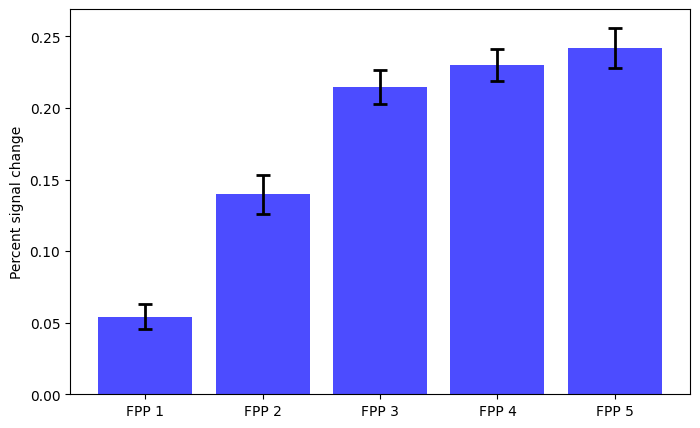

In [61]:
x = np.arange(len(mean_FPPs_all_runs_all_subjects))

plt.figure(figsize=(8, 5))
bars = plt.bar(x, mean_FPPs_all_runs_all_subjects, yerr=SEM_FPPs_all_runs_all_subjects, capsize=5, color='blue', alpha=0.7, ecolor='black', error_kw={'elinewidth':2, 'capsize':5, 'capthick':2})

plt.ylabel('Percent signal change')
plt.xticks(x, [f'FPP {i+1}' for i in x])  

plt.show()